In [1]:
'''
This is a simple and Machine Learning model selection & evaluation for making predictions on the Iris Data Set 
'''

#Load libraries
# For inline plotting
%matplotlib inline

import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#Load Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

In [3]:
'''
Summarize the Dataset:

- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.
'''
# Dimensions of Dataset
print(dataset.shape)

(150, 5)


In [24]:
# Peek at the Data
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [31]:
dataset.iloc[90]

sepal-length                5.5
sepal-width                 2.6
petal-length                4.4
petal-width                 1.2
class           Iris-versicolor
Name: 90, dtype: object

In [5]:
# Statistical Summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Class Distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


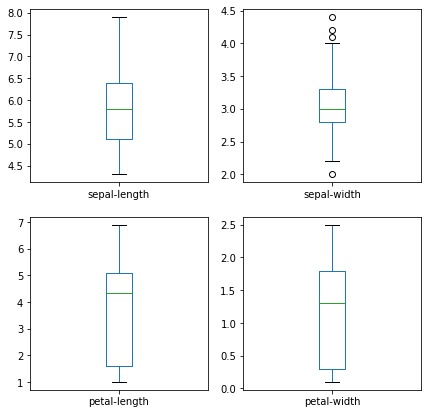

In [7]:
'''
Data Visualization - We are going to look at two types of plots

- Univariate plots to understand each attribute.
- Multivariate plots to understand the relationships between attributes.
'''

# Univariate Plots - Box plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(7,7))
plt.show()

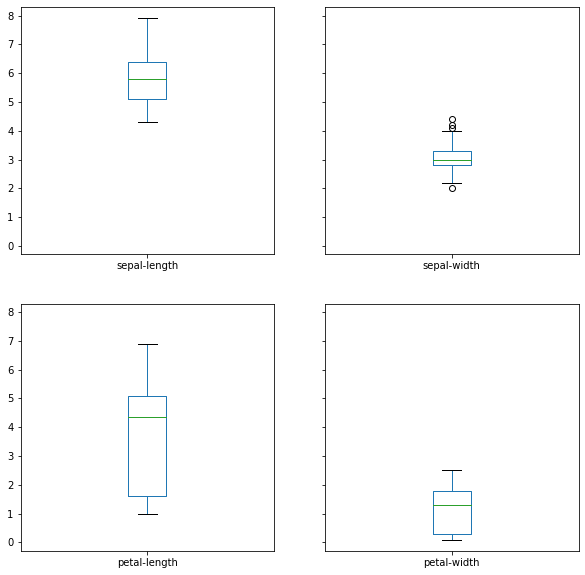

In [8]:
# Same as the above, but with `sharex` and `sharey` set to True. 
# Helps me understand the relative size of the attributes 

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=True, sharey=True, figsize=(10,10))
plt.show()

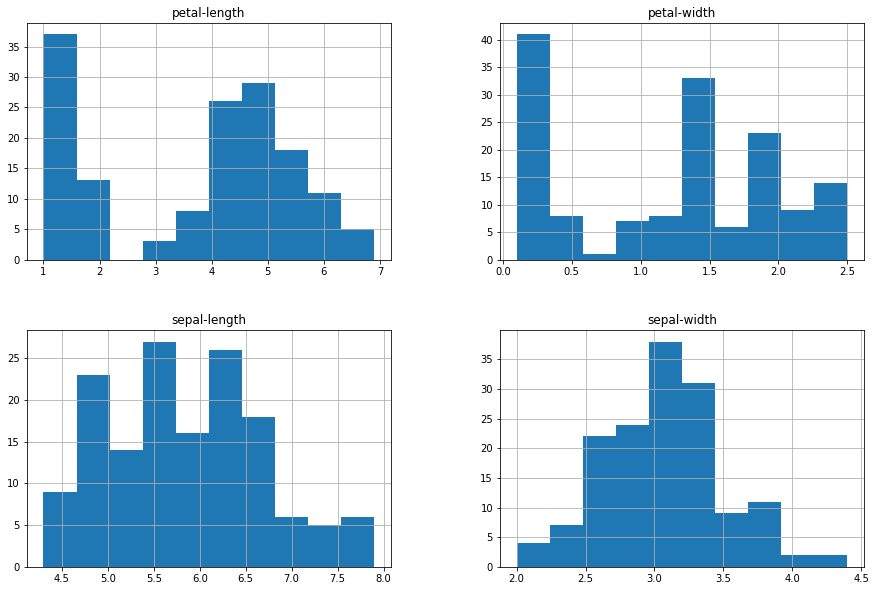

In [9]:
# Histograms

dataset.hist(figsize=(15,10))
plt.show()

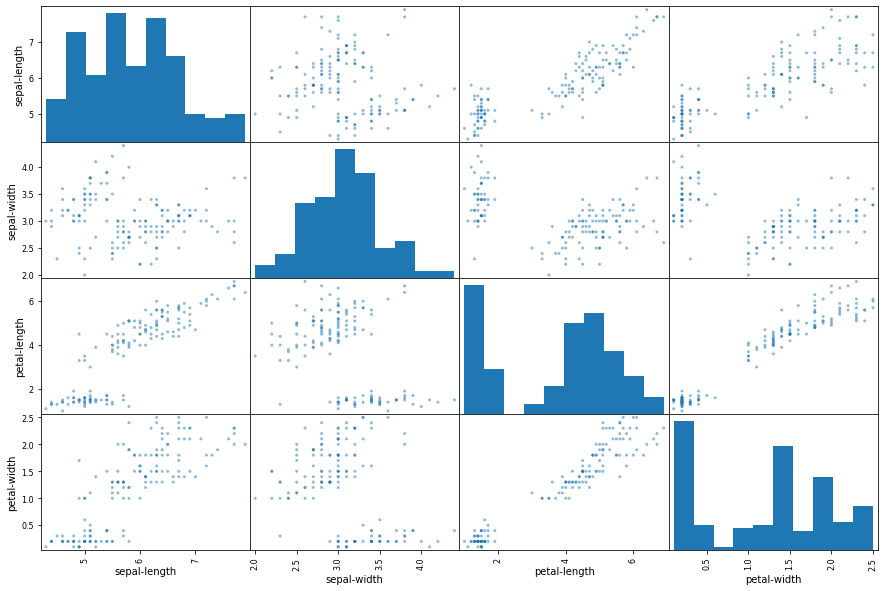

In [10]:
# Multivariate Plots - Diagonal grouping of some attribute-pairs indicate high correlation and predictable relationship.

# Scatter plot matrix
scatter_matrix(dataset, figsize=(15,10))
plt.show()

#For Better Looks 
#seaborn.pairplot(dataset, hue="Species", size = 3)
#seaborn.set()

#seaborn.pairplot(dataset, hue="Species", size=3, diag_kind="kde")
#plt.show()

In [11]:
'''
Evaluate Some Algorithms - Let's create some models of the data and estimate their accuracy on unseen data.
We will:

- Separate out a validation dataset (create training and validation datasets)
- Set-up the test to use 10-fold cross validation.
- Build 5 different models to predict species from flower measurements
- Select the best model.
'''

# Create a Validation Dataset

array = dataset.values

In [12]:
# Select all rows and the first 4 attributes: sepal-length, sepal-width, petal-length, petal-width
X = array[:,0:4]

# Select all rows and the 5th attribute. Content: Iris-setosa, Iris-versicolor, Iris-virginica
Y = array[:,4]

In [13]:
X[0]

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [14]:
Y[0]

'Iris-setosa'

In [15]:
# 80% of the dataset to train the models and 20% of the dataset to validate
validation_size = 0.20

In [16]:
'''
Load the training data into X_train and Y_train for preparing models & into X_validation and Y_validation 
sets for testing or validating our model.
'''
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
              Y, 
              test_size=validation_size, 
              random_state=seed)

In [17]:
'''
Test Harness - Split the dataset into 10 parts: train on 9 and test on 1.
Then, repeat for all combinations of train-test splits.
accuracy => metric for model evaluation

accuracy = (No of correctly predicted instances / Total no of instances in the data set ) * 100
'''
seed = 7
scoring = 'accuracy'

In [18]:
'''
Build Models - We will evaluate 6 different algorithms:

Linear:
- Logistic Regression (LR) 
- Linear Discriminant Analysis (LDA)

Non Linear:
- K-Nearest Neighbors (KNN) 
- Classification and Regression Trees (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)

Reset the random number seed before each run to ensure that the evaluation of each algorithm is performed 
using exactly the same data splits. It ensures the results are directly comparable
'''

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [19]:
# Evaluate each model in turn
import warnings
warnings.filterwarnings('ignore')

results = []
names = []

for name, model in models:
    #
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #
    cv_results = model_selection.cross_val_score(model, 
                                  X_train, Y_train, 
                                  cv=kfold, scoring=scoring)
    #
    results.append(cv_results)
    names.append(name)
    msg = "{0}: {1:f} ({2:f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


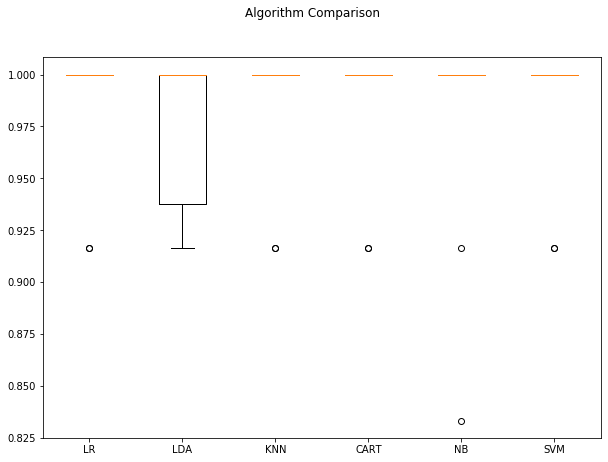

In [20]:
'''
Select the Best Model
Create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 
There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times
(10 fold cross validation).
'''

fig = plt.figure(figsize=(10,7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
'''
Make Predictions - We will use the KNN and the SVC models to make predictions
on the validation dataset for a final accuracy evaluation.
'''

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("Accuracy score:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report:")
print(classification_report(Y_validation, predictions))
print()

Accuracy score:
0.9

confusion_matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30




In [32]:
row = [[5.1,3.5,1.4,0.2]]
label = knn.predict(row)
print('Data=%s, Predicted: %s' % (row, label))

Data=[[5.1, 3.5, 1.4, 0.2]], Predicted: ['Iris-setosa']


In [33]:
row_1 = [[6.3,3.3,6.0,2.5]]
label_1 = knn.predict(row_1)
print('Data=%s, Predicted: %s' % (row_1, label_1))

Data=[[6.3, 3.3, 6.0, 2.5]], Predicted: ['Iris-virginica']


In [34]:
row_2 = [[5.5,2.6,4.4,1.2]]
label_2 = knn.predict(row_2)
print('Data=%s, Predicted: %s' % (row_2, label_2))

Data=[[5.5, 2.6, 4.4, 1.2]], Predicted: ['Iris-versicolor']


In [35]:
row_n = [[4.8,2.9,2.3,1.8]]
label_n = knn.predict(row_n)
print('Data=%s, Predicted: %s' % (row_n, label_n))

Data=[[4.8, 2.9, 2.3, 1.8]], Predicted: ['Iris-versicolor']


In [36]:
# SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print("Accuracy score:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report:")
print(classification_report(Y_validation, predictions))
print()

Accuracy score:
0.8666666666666667

confusion_matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30




In [37]:
'''
Conclusion: Support Vector Machines (SVM) with an accuracy of 86% comes out as a 2nd better contender
for this analysis. Where as KNN proved to be better with an accuracy of 90%.
'''

'\nConclusion: Support Vector Machines (SVM) with an accuracy of 86% comes out as a 2nd better contender\nfor this analysis. Where as KNN proved to be better with an accuracy of 90%.\n'